In [1]:
import pandas as pd
import numpy as np
import pylab as plt
from zooniverse_config import date
from zooniverse_utils import load_posterior_dicts_dataframe, show_triplet_and_posteriors, readinzooniverse

pthreshold = 0.1 # the probability needs to be >1-pthreshold (of R or B)
stability_numbers = 3 #the last 3 posterior value need to be stable
stability_threshold = 0.01 #stability within this threshold

In [2]:
posteriors = load_posterior_dicts_dataframe(f"outputs/posteriorsdf_saved_{date}.pqt")

In [3]:
preals = posteriors['preals']
skills = posteriors['skills']
labels = posteriors['labels']    
len(preals)

90736

In [4]:
subjects = np.array(list(preals.keys()))
subjects

array([113677536, 113677537, 113677538, ..., 115998000, 115998001,
       115998002])

In [5]:
chainlength = np.array([len(preals[k]) for k in preals.keys()])
chainlength

array([11,  7,  8, ...,  7,  8,  8])

Text(0.5, 0, 'log number of labels (1-10)')

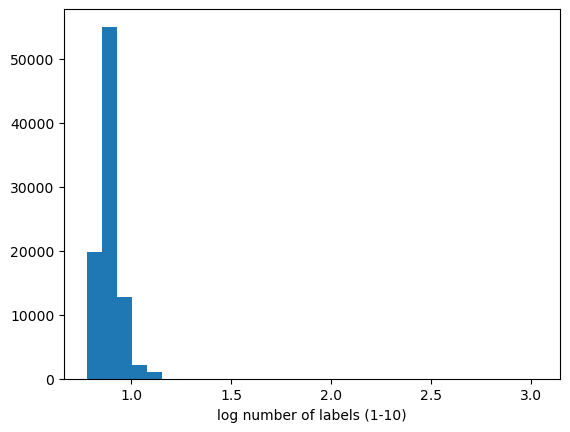

In [36]:
plt.hist(np.log10(chainlength), bins=30);
plt.xlabel("log number of labels (1-10)")

In [6]:
post_real = np.array([preals[k][-1] for k in preals.keys()])
post_real

array([9.95274617e-01, 6.99792449e-01, 9.48971113e-01, ...,
       8.27051290e-01, 1.11585164e-03, 5.30756392e-04])

In [7]:
over_thr_posteriors = (post_real > 1 - pthreshold) | (post_real < pthreshold)
over_thr_posteriors.sum()

76648

In [8]:
stable_posteriors = np.array([(np.diff(preals[k][-stability_numbers-1:])<stability_threshold).all() for k in preals.keys()]) & \
                        ((post_real > 1 - pthreshold) | (post_real < pthreshold))
stable_posteriors.sum()

52931

reading in saved file outputs/zooniversedf_saved_02012026.csv


3it [00:18,  6.33s/it]


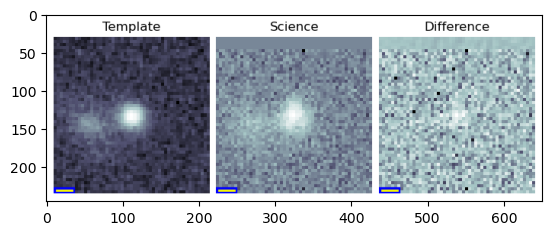

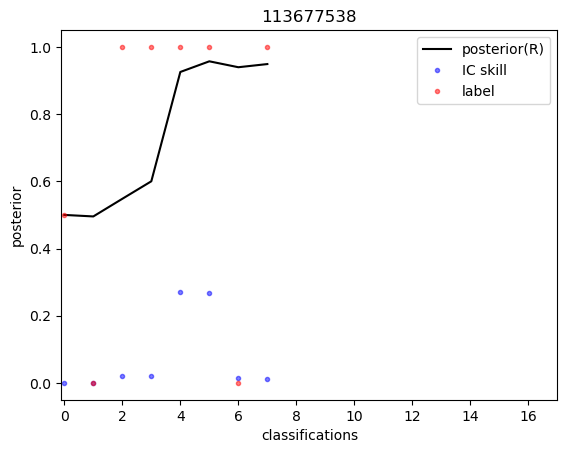

In [9]:
#one example
zooniverse, multilabel, users =  readinzooniverse(f"outputs/zooniversedf_saved_{date}.csv")
show_triplet_and_posteriors(113677538, zooniverse, posteriors=None,
                                posteriors_file=f"outputs/posteriorsdf_saved_{date}.pqt")


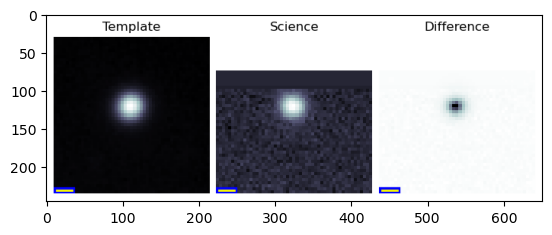

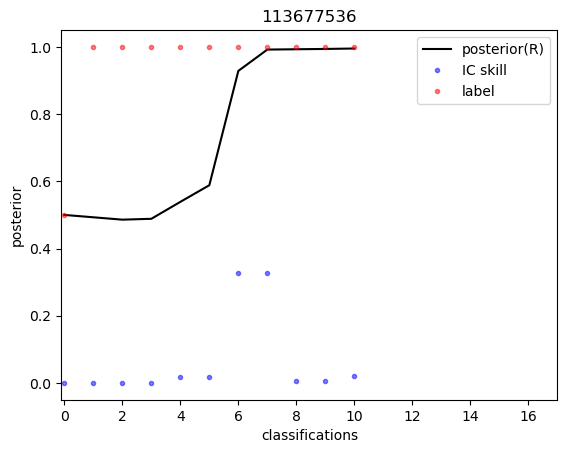

In [10]:
#another example
posteriors = {"preals":preals, "skills":skills, "labels":labels}
show_triplet_and_posteriors(113677536, zooniverse, posteriors=posteriors)

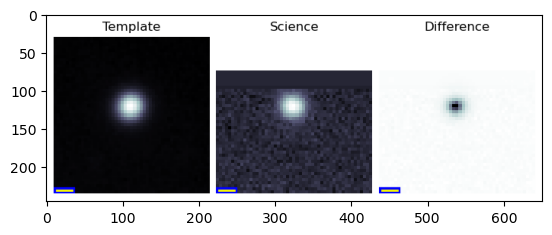

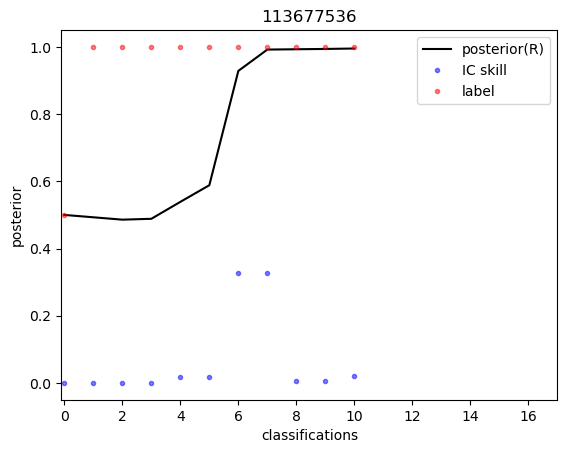

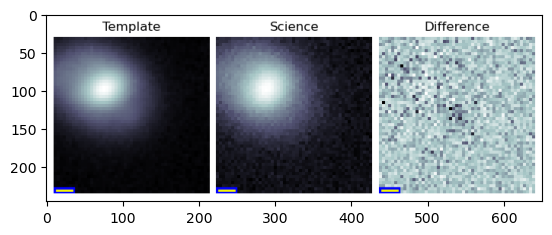

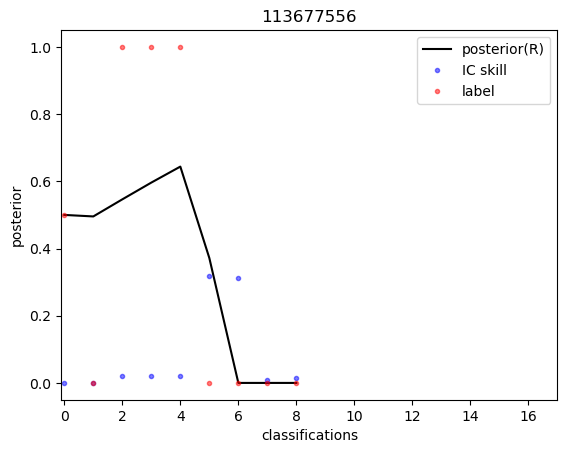

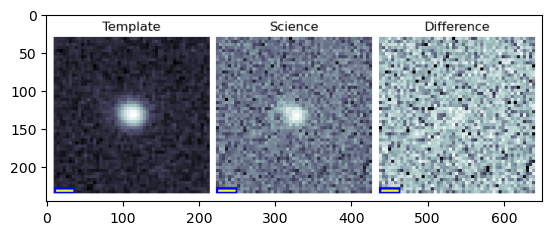

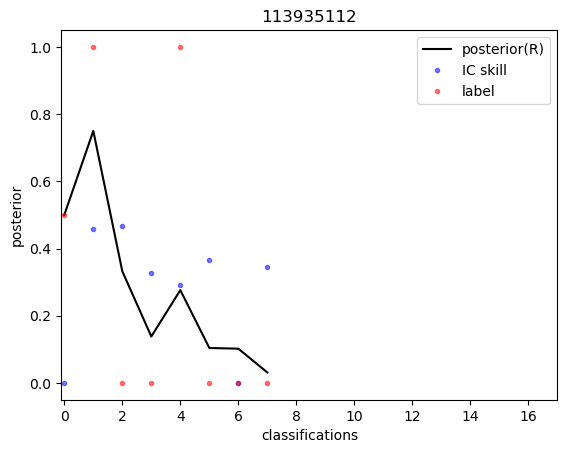

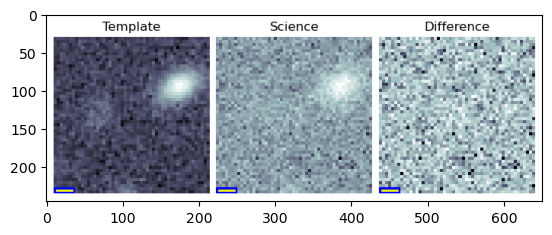

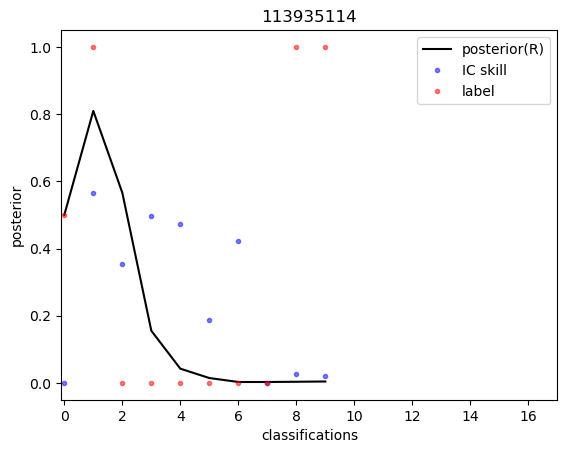

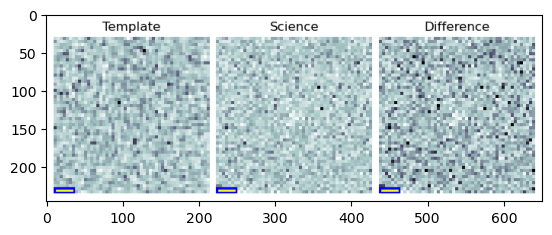

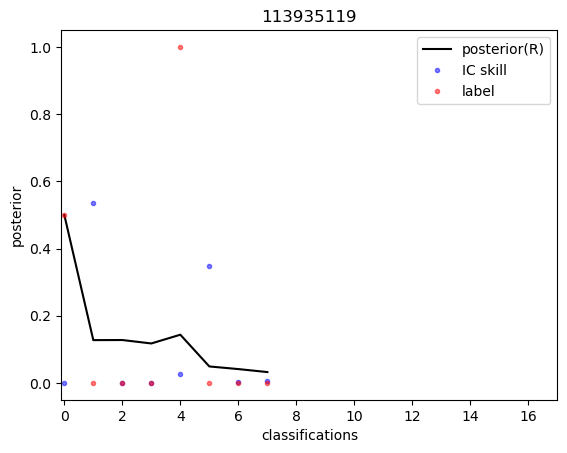

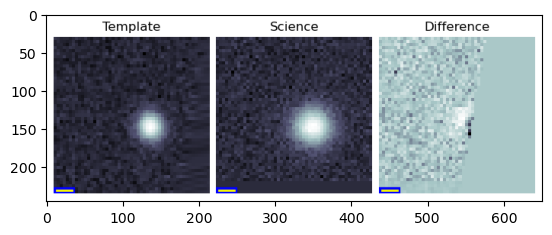

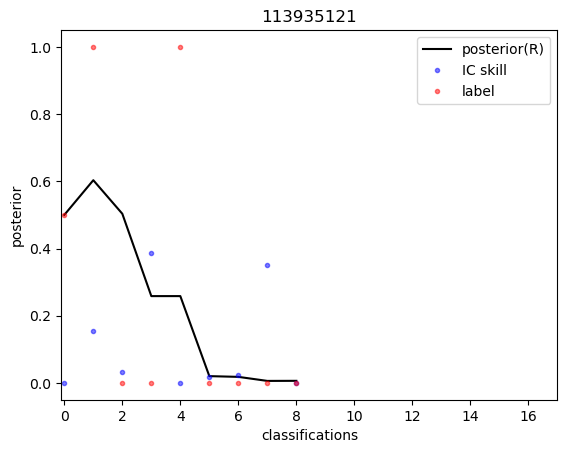

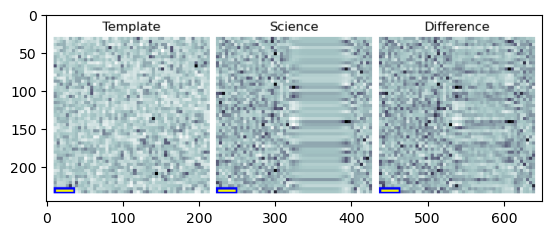

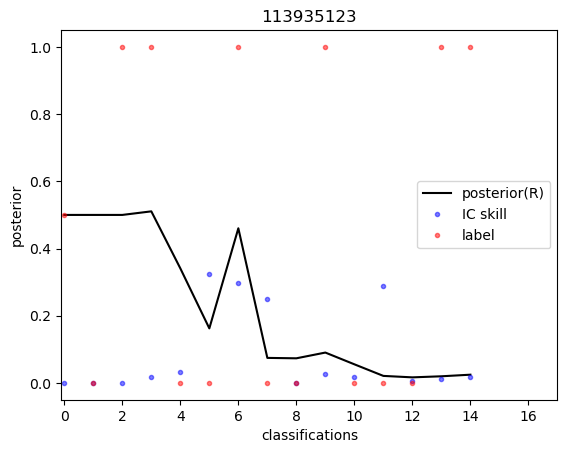

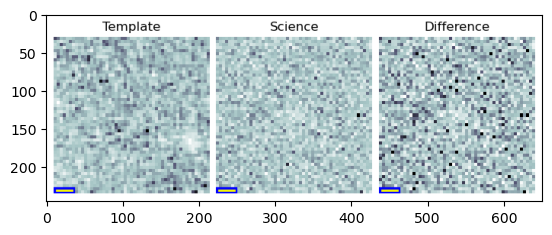

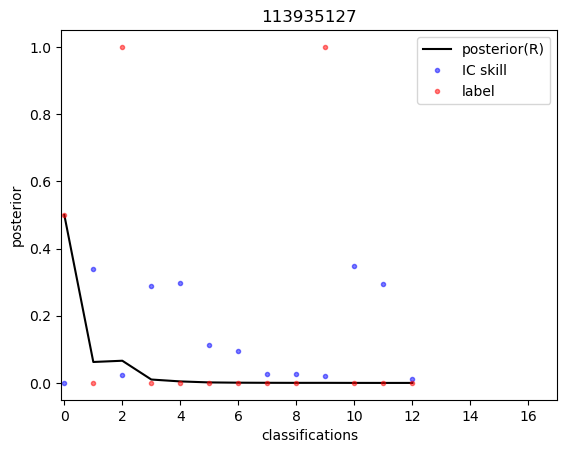

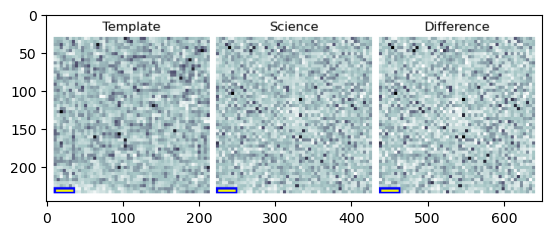

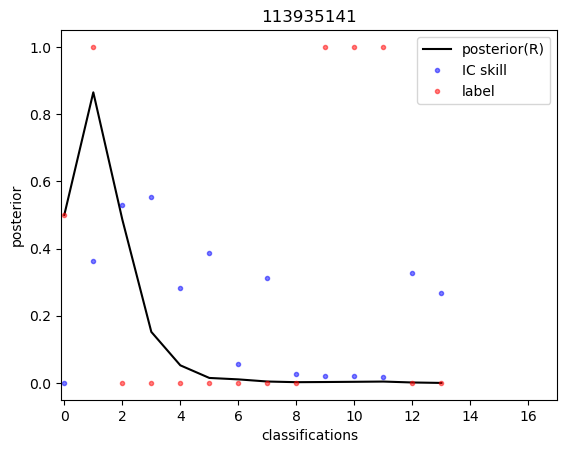

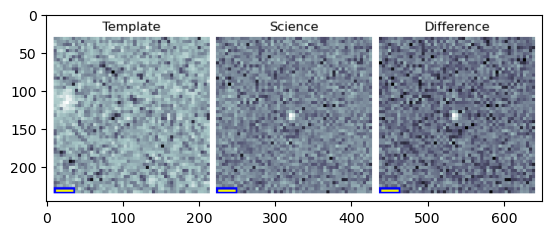

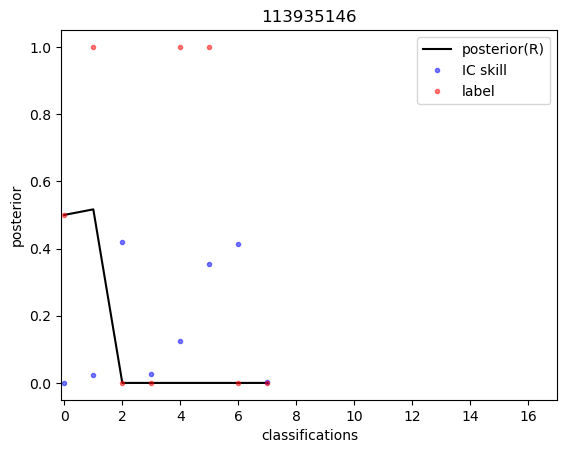

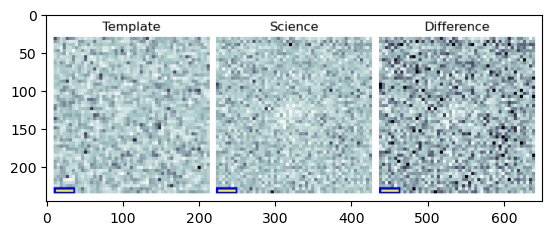

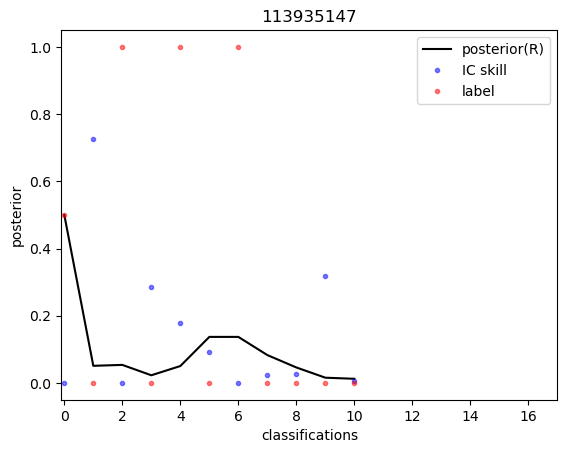

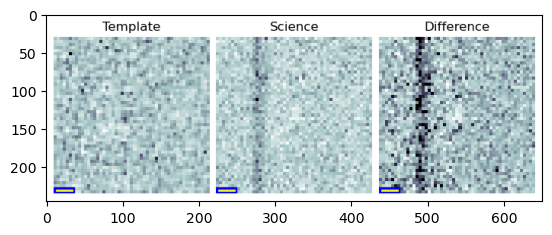

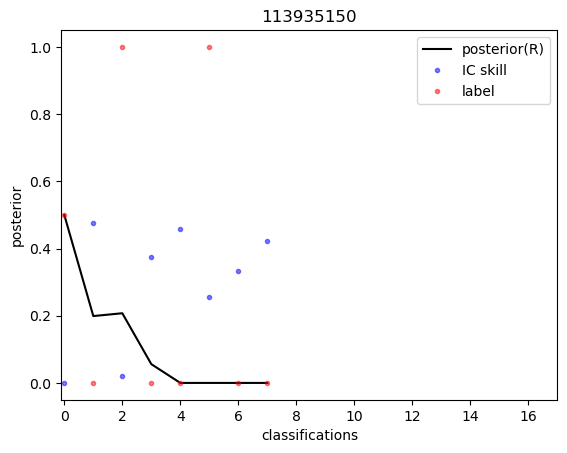

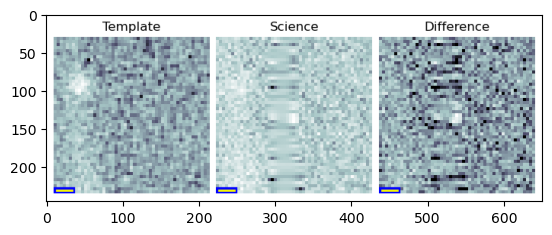

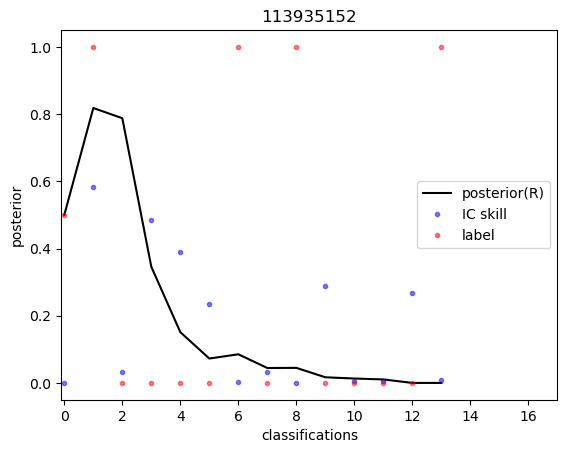

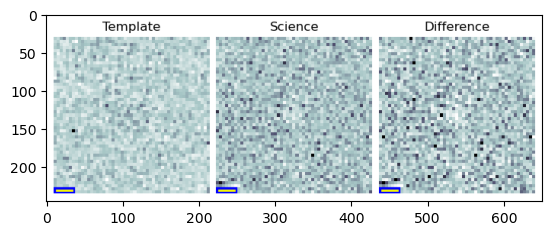

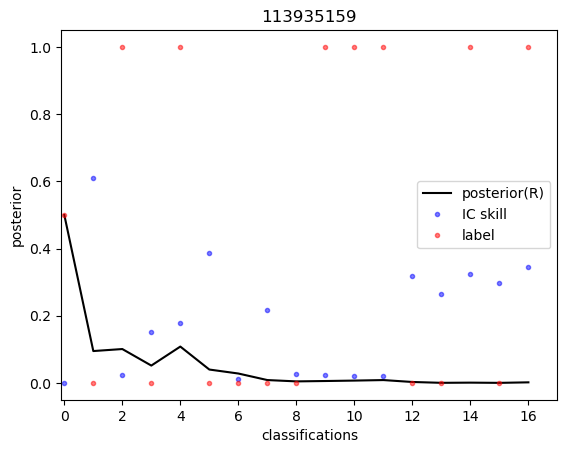

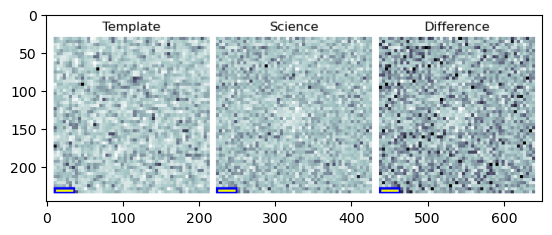

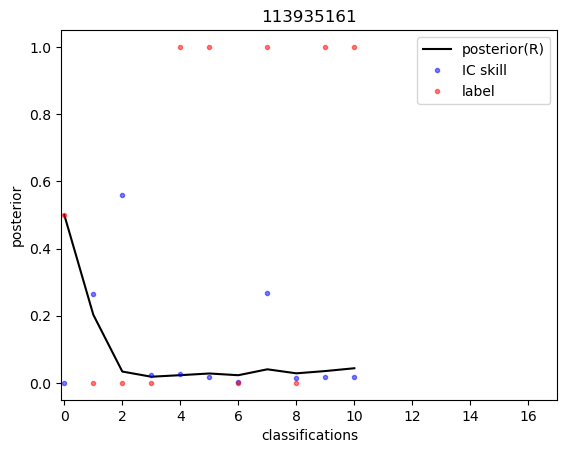

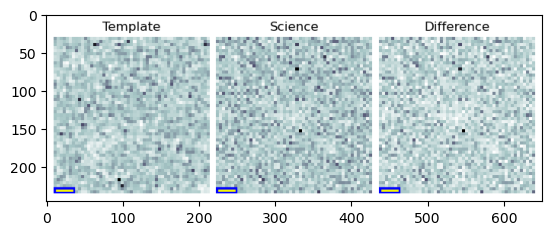

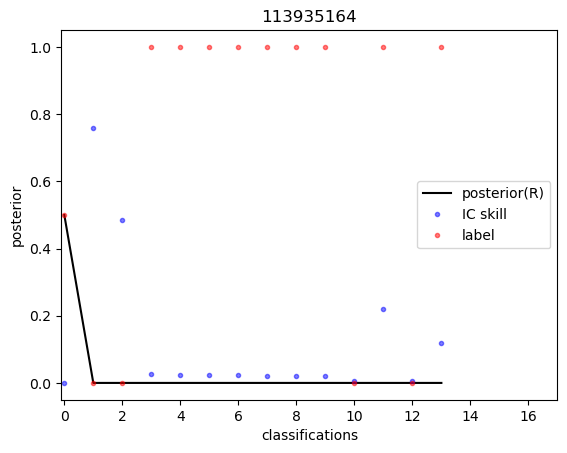

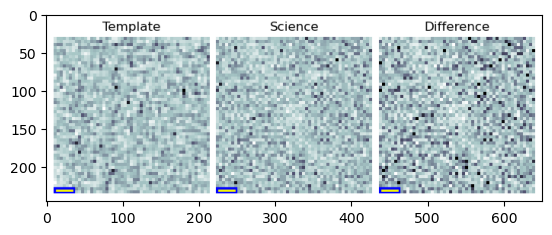

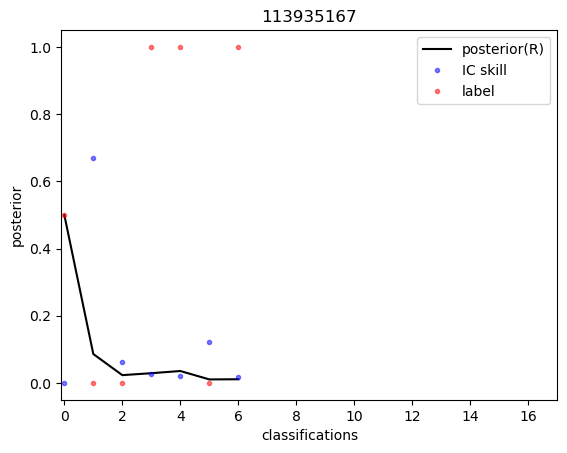

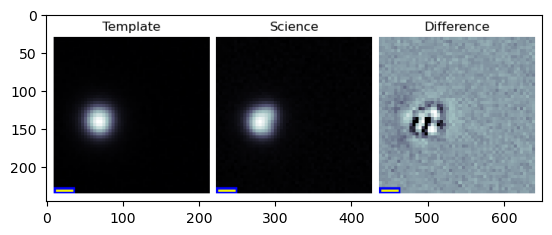

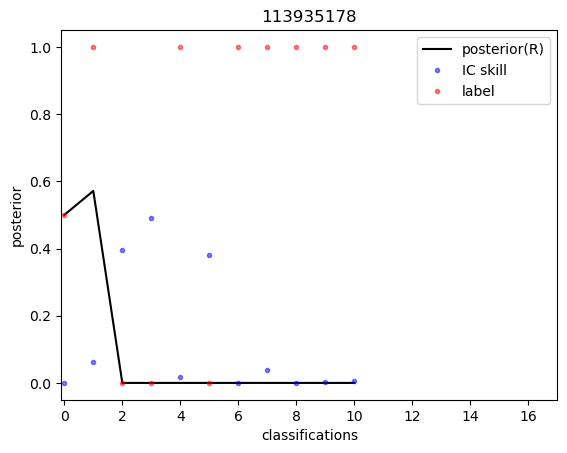

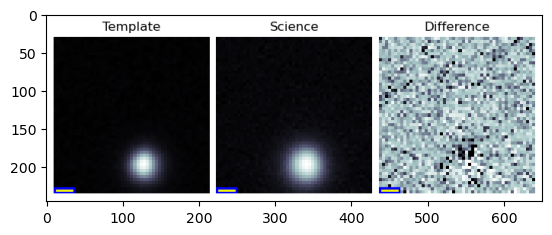

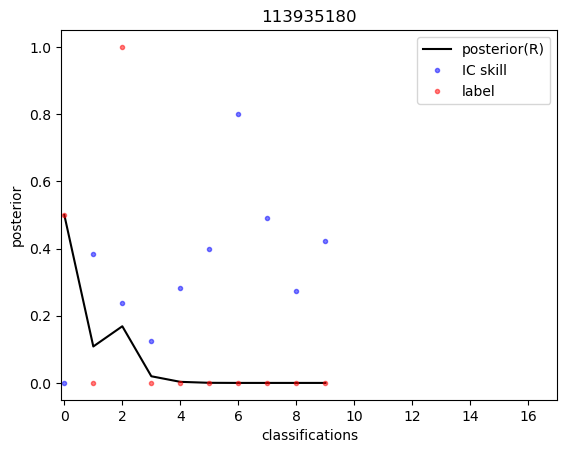

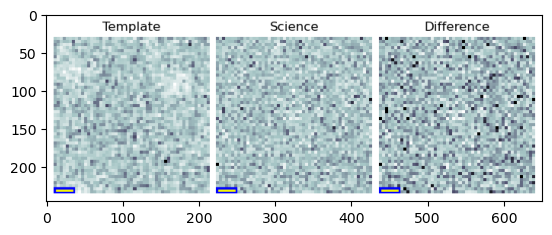

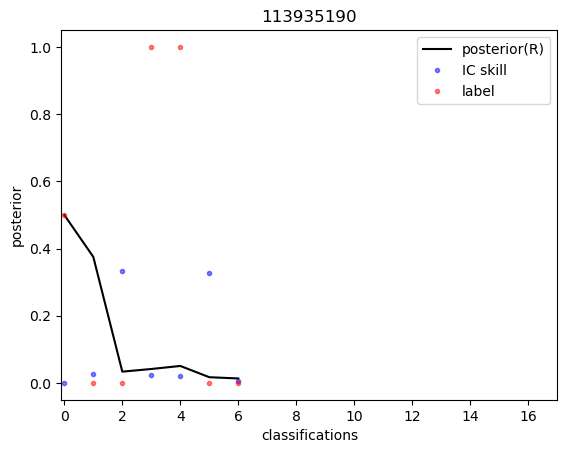

In [37]:
#10 that solidly converge 
for s in subjects[stable_posteriors][:20]: 
    show_triplet_and_posteriors(s, zooniverse, posteriors=posteriors)

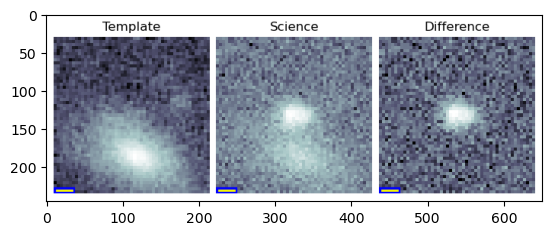

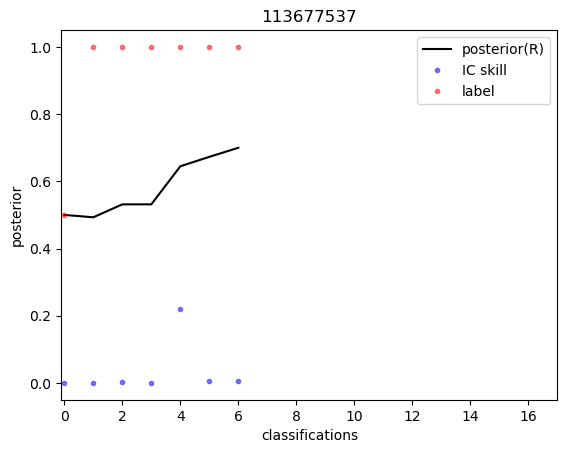

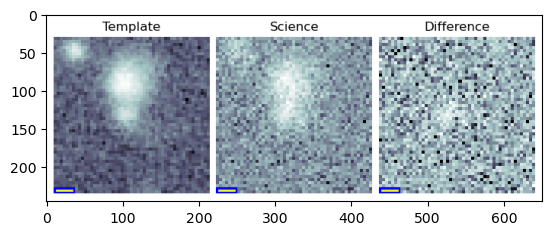

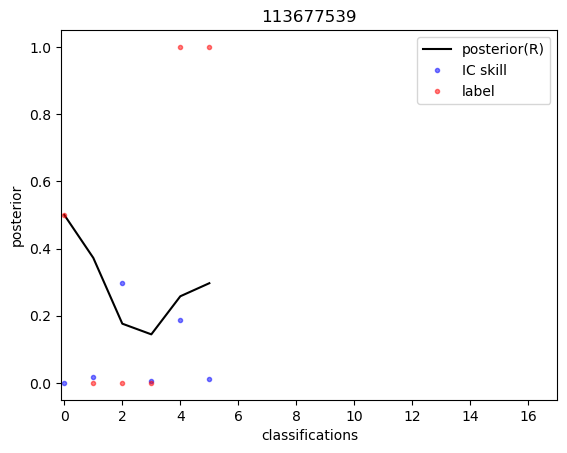

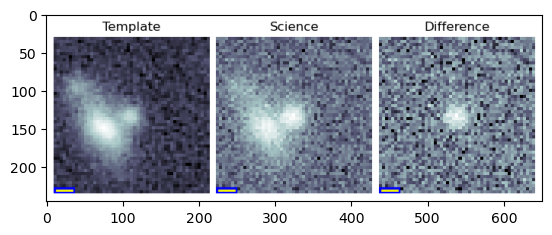

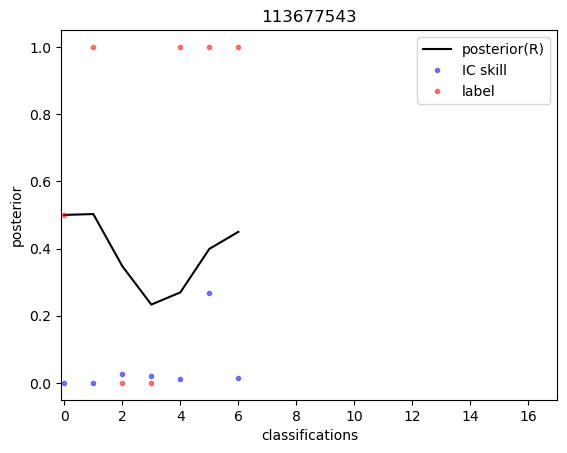

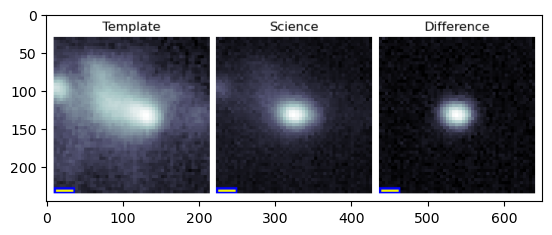

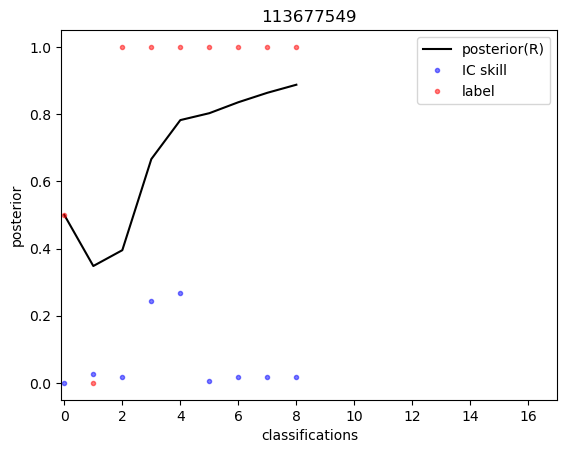

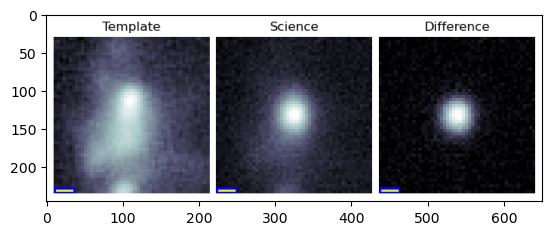

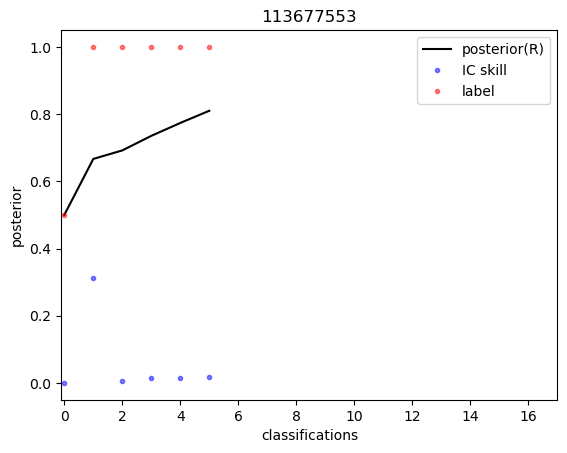

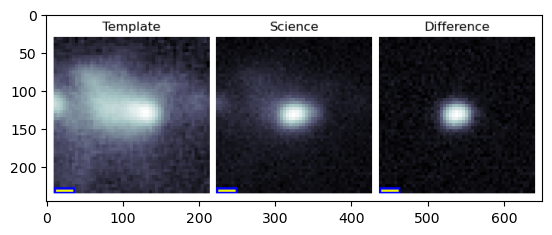

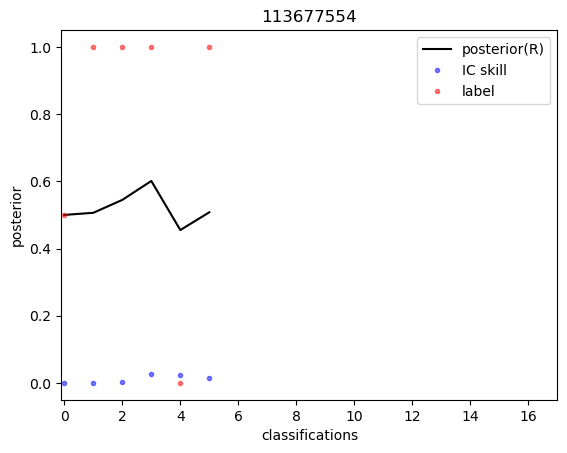

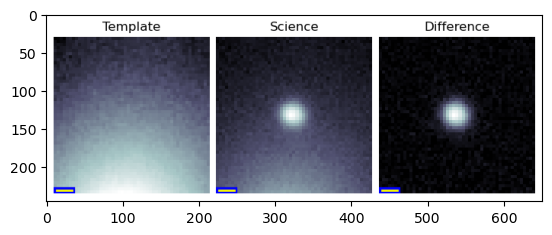

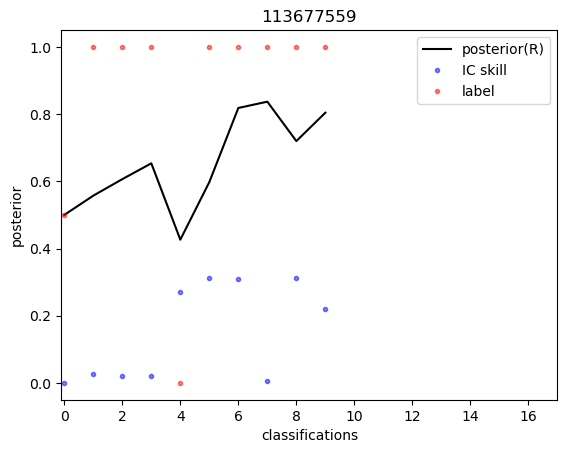

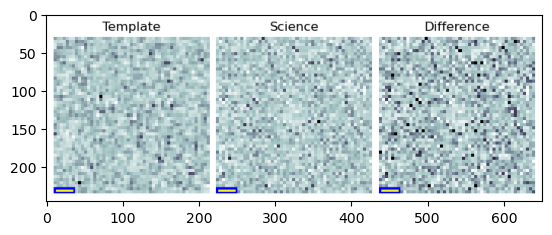

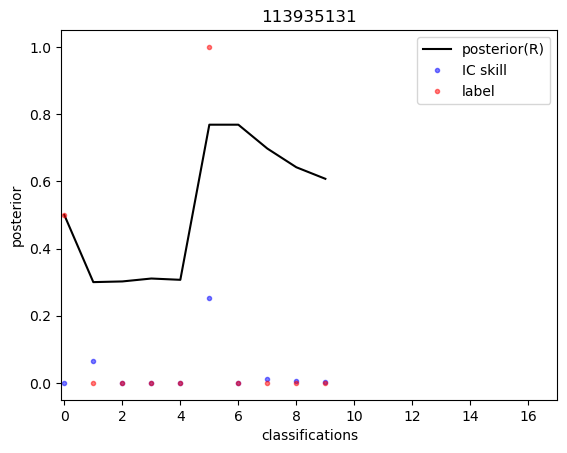

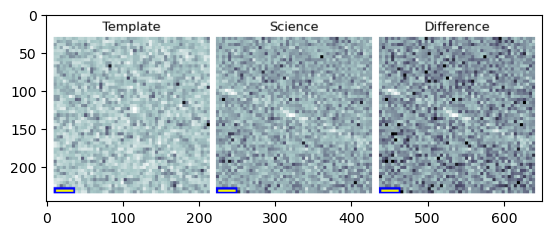

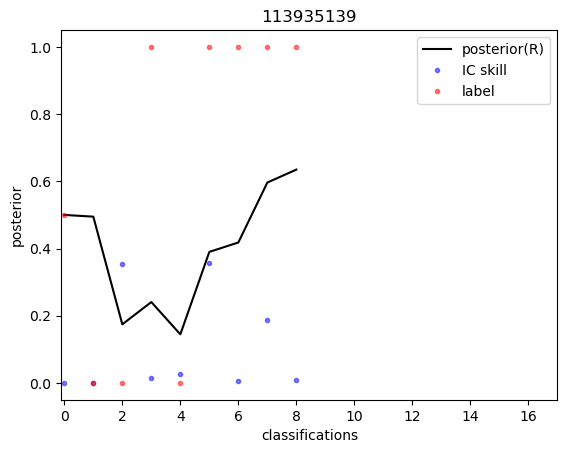

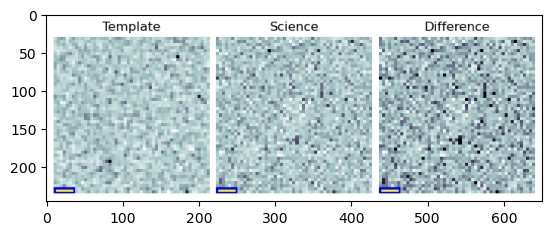

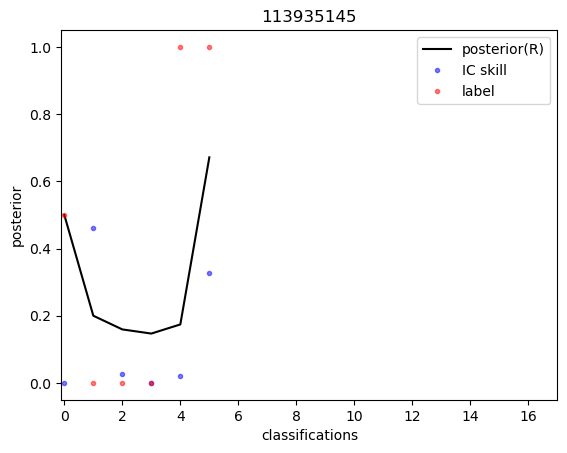

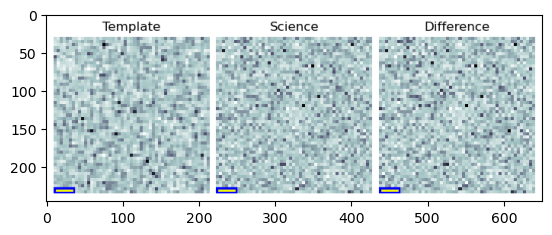

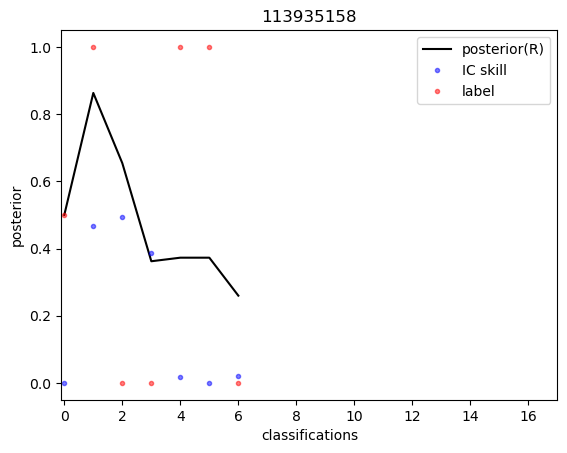

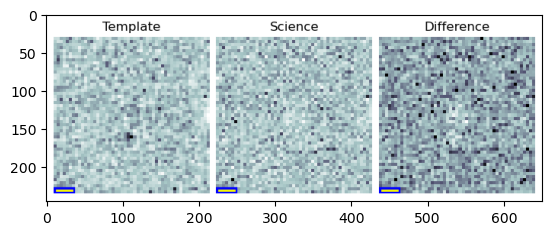

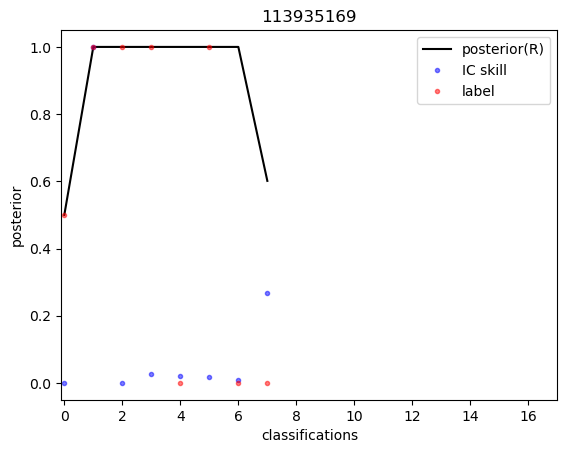

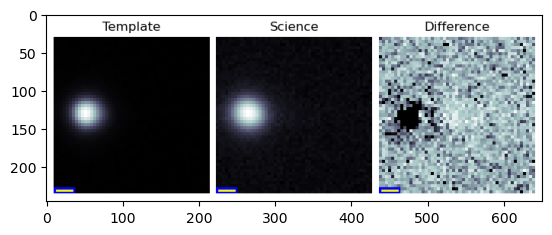

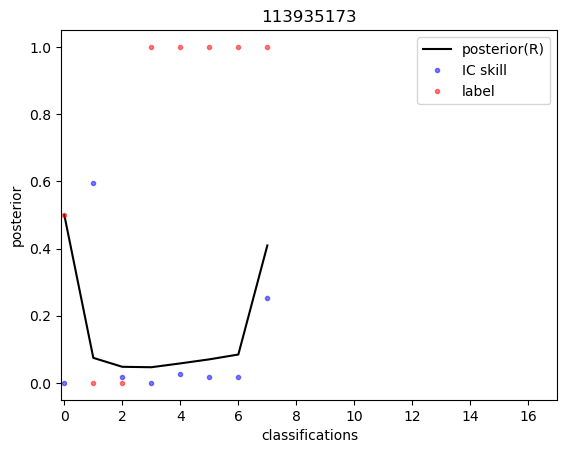

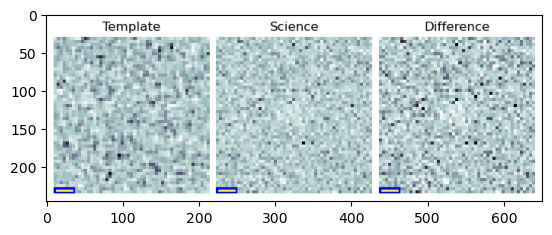

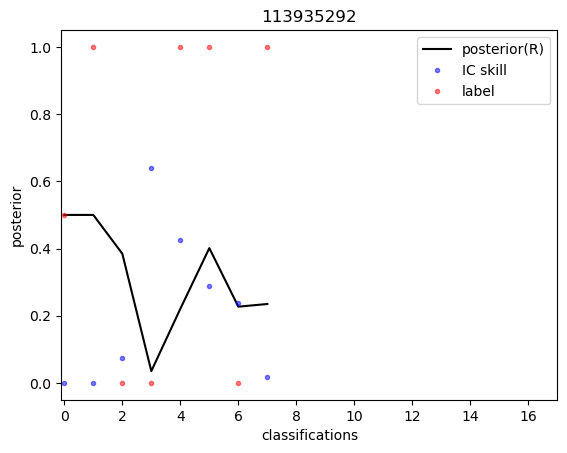

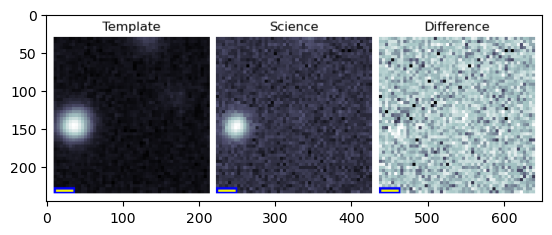

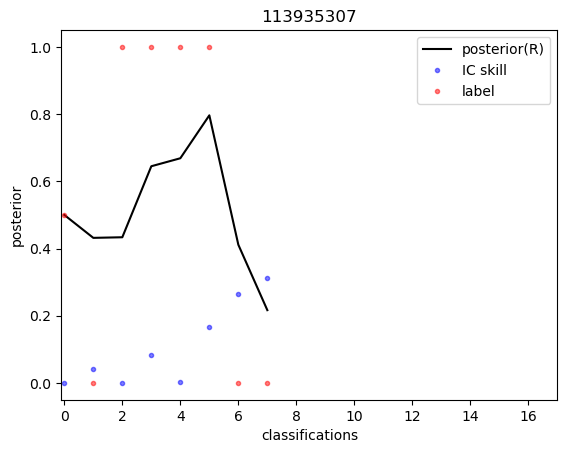

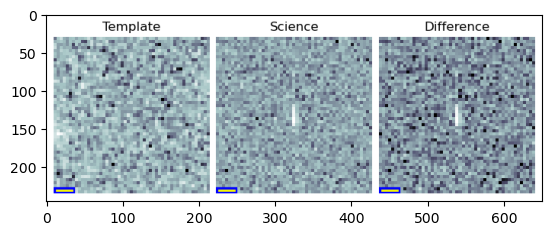

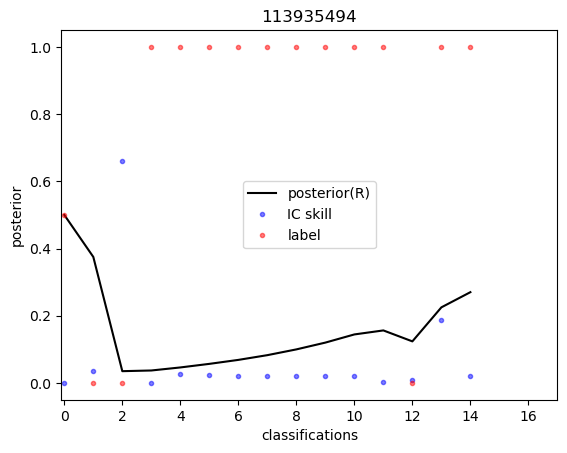

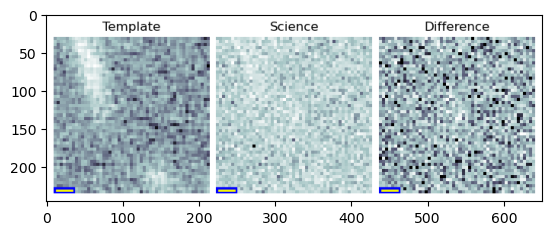

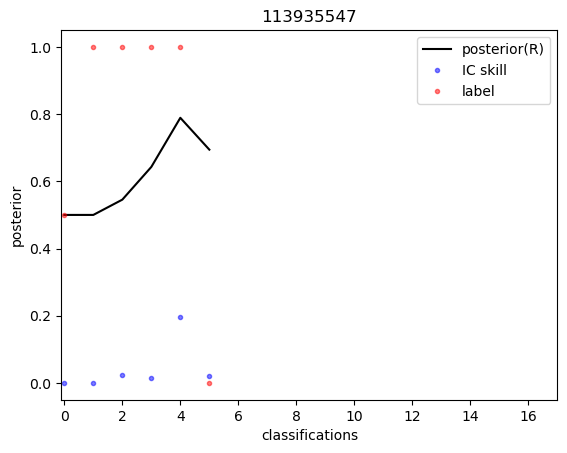

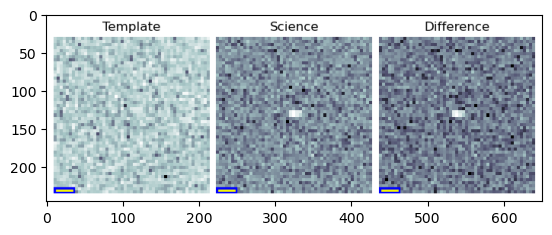

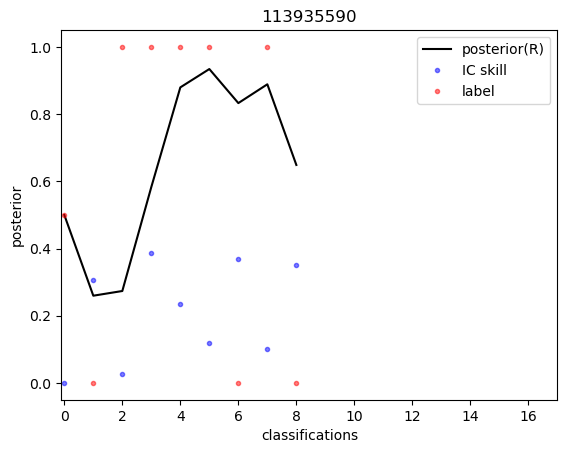

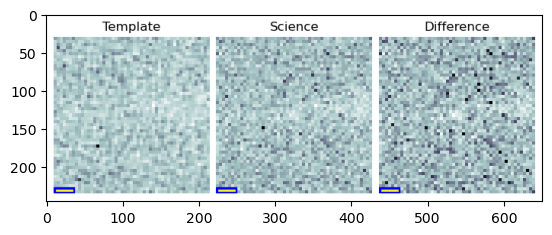

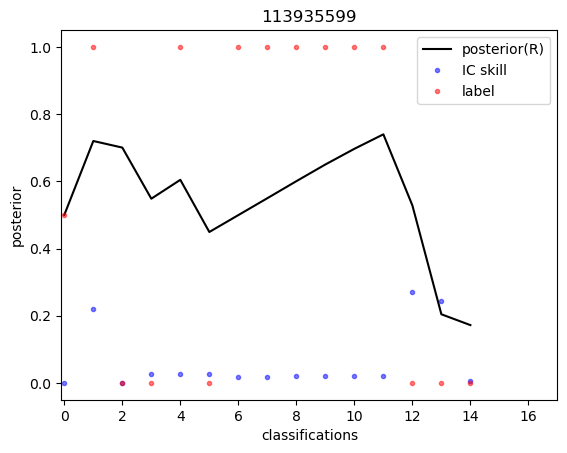

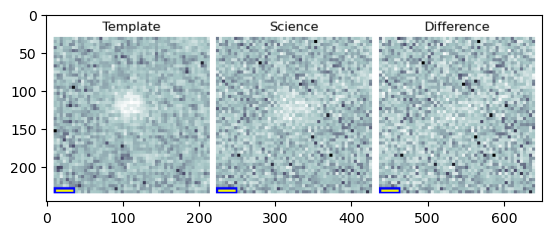

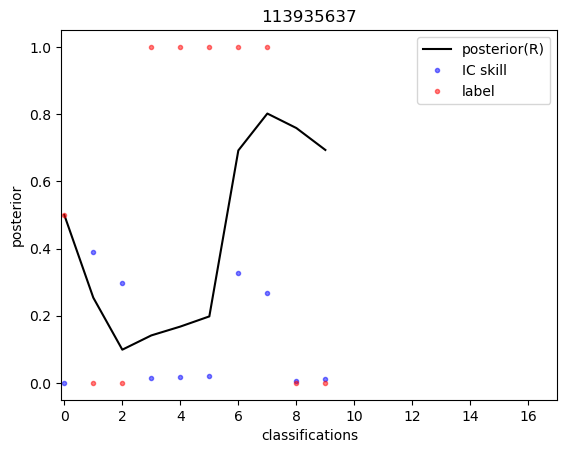

In [38]:
#10 that did not converge yet
for s in subjects[~over_thr_posteriors][:20]: #
    show_triplet_and_posteriors(s, zooniverse, posteriors=posteriors)

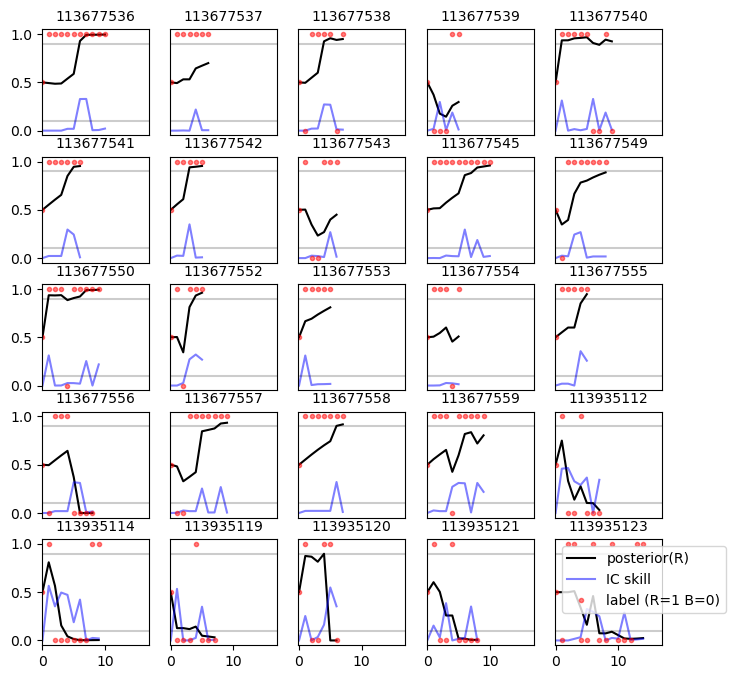

In [27]:
Nplots = 25 
fig, axs = plt.subplots(int(Nplots / 5), 5, figsize=(8,8))  
axs = axs.ravel()
Nplots  = int(Nplots / 5) * 5
for s in range(Nplots):
    subject = subjects[s]
    axs[s].plot(preals[subject], 'k-', label="posterior(R)")
    #axs[s].plot(ic[subject], 'r.', label="skill proxy")
    axs[s].plot(skills[subject], 'b-', label="IC skill", alpha=0.5)
    axs[s].plot(labels[subject], 'r.', label="label (R=1 B=0)", alpha=0.5)
    axs[s].set_xlim(-0.1,17)
    axs[s].set_ylim(-0.05,1.05)
    axs[s].set_title(f"{subject}", fontsize=10)
    axs[s].axhline(pthreshold, color="k", alpha=0.2)
    axs[s].axhline(1-pthreshold, color="k", alpha=0.2)
    if s < 20 : axs[s].set_xticks([])
    if s % 5 : axs[s].set_yticks([])
    #axs[s].axis('off')

axs[-1].legend(loc='best')
plt.show()